In [1]:
%pip install -r /workspace/Brain_tumour_diagnostic/requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import joblib
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
cwd = os.getcwd()
work_dir =os.getcwd()

In [4]:
my_data_dir = 'inputs/brain_tumour_dataset'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

In [5]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['glioma', 'healthy', 'meningioma', 'pituitary']


In [6]:
version = "v1"

In [7]:
model = load_model(f'outputs/{version}/brain_tumour_model.h5')

2024-10-03 14:50:59.894316: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
## Import saved image shape embedding
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(224, 222, 3)

Image shape: (222, 224), Image mode: RGB


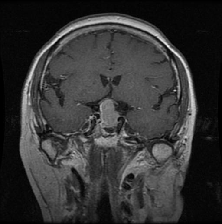

In [36]:
pointer = 50
label = labels[3]  # select

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

In [37]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 224, 222, 3)


In [11]:
class_indices = joblib.load(filename=f'outputs/{version}/class_indices.pkl')


In [38]:
maxvalue = model.predict(my_image)[0].max()
class_index = np.where(model.predict(my_image)[0] == maxvalue)[0][0]
target_map = {v: k for k, v in class_indices.items()}
pred_class = target_map[class_index]

print(f'{maxvalue*100:.1f}%')
print(pred_class)

probabilities = model.predict(my_image)[0]

i=0
for probability in probabilities:
    print(f'{target_map[i]} : {probability*100:.1f}%')
    i += 1

96.8%
pituitary
glioma : 1.5%
healthy : 0.0%
meningioma : 1.7%
pituitary : 96.8%
